# Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization

## Processing Speeches with SpaCy

In [1]:
# Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization

import pandas as pd
import spacy
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('seaborn-v0_8-dark')

# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")

In [2]:
# Load the SOTU data
sou = pd.read_csv("data/SOTU.csv")
print(f"Total speeches: {len(sou)}")

# Subset for speeches from 2000 onwards (as required by Part 2)
sou_2000 = sou[sou['Year'] >= 2000].copy()
print(f"Speeches from 2000 onwards: {len(sou_2000)}")
sou_2000.head()

Total speeches: 246
Speeches from 2000 onwards: 25


,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


In [3]:
# Process each speech using SpaCy's nlp function
# This will take about 30 seconds
processed_speeches = []
for text in tqdm(sou_2000['Text'], desc="Processing speeches"):
    doc = nlp(text)
    processed_speeches.append(doc)

print(f"Processed {len(processed_speeches)} speeches")

Processing speeches: 100%|██████████| 25/25 [00:26<00:00,  1.05s/it]

Processed 25 speeches


## Token vs Lemma Analysis

In [4]:
# Create a list of tokens across all speeches
# Excluding spaces, stopwords, and punctuation
tokens_list = []

for doc in processed_speeches:
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            tokens_list.append(token.text.lower())

print(f"Total tokens extracted: {len(tokens_list)}")

# Count and display top 20 tokens
token_counts = Counter(tokens_list)
print("\nTop 20 most common tokens:")
for token, count in token_counts.most_common(20):
    print(f"('{token}', {count})")

Total tokens extracted: 75983

Top 20 most common tokens:
('america', 816)
('people', 637)
('american', 582)
('new', 530)
('years', 439)
('americans', 437)
('world', 425)
('year', 406)
('country', 369)
('jobs', 348)
('tonight', 344)
('work', 324)
('know', 323)
('let', 320)
('congress', 317)
('nation', 311)
('time', 301)
('help', 282)
('need', 266)
('tax', 255)


In [5]:
# Create a list of lemmas for the same tokens
lemmas_list = []

for doc in processed_speeches:
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            lemmas_list.append(token.lemma_.lower())

print(f"Total lemmas extracted: {len(lemmas_list)}")

# Count and display top 20 lemmas
lemma_counts = Counter(lemmas_list)
print("\nTop 20 most common lemmas:")
for lemma, count in lemma_counts.most_common(20):
    print(f"('{lemma}', {count})")

Total lemmas extracted: 75983

Top 20 most common lemmas:
('year', 845)
('america', 816)
('people', 639)
('american', 587)
('work', 557)
('new', 532)
('job', 486)
('country', 435)
('americans', 432)
('world', 426)
('know', 395)
('nation', 388)
('help', 378)
('need', 353)
('time', 351)
('tonight', 344)
('child', 332)
('let', 326)
('congress', 317)
('come', 301)


In [6]:
# Analysis: Compare tokens vs lemmas
print("Token vs Lemma Comparison:")
print("=" * 50)
print("\nNotice how lemmas combine related word forms:")
print(f"- Token 'years': {token_counts['years']}")
print(f"- Token 'year': {token_counts['year']}")
print(f"- Lemma 'year': {lemma_counts['year']}")
print()
print(f"- Token 'jobs': {token_counts['jobs']}")
print(f"- Token 'job': {token_counts['job']}")
print(f"- Lemma 'job': {lemma_counts['job']}")

Token vs Lemma Comparison:

Notice how lemmas combine related word forms:
- Token 'years': 439
- Token 'year': 406
- Lemma 'year': 845

- Token 'jobs': 348
- Token 'job': 155
- Lemma 'job': 486


## Word Frequency Analysis by Year

In [10]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """
    # Step 1: Subset df for the year (convert year to float for comparison)
    year_df = df[df['Year'] == float(year)]
    
    if year_df.empty:
        print(f"No speeches found for year {year}")
        return []
    
    # Step 2: Process the text with spaCy
    lemmas_year = []
    for text in tqdm(year_df['Text'], desc=f"Processing year {year}"):
        doc = nlp(text)
        
        # Step 3: Get lemmas (excluding stop words, punctuation, spaces)
        for token in doc:
            if not token.is_stop and not token.is_punct and not token.is_space:
                lemmas_year.append(token.lemma_.lower())
    
    # Step 4: Count and return top n lemmas
    lemma_counts = Counter(lemmas_year)
    return lemma_counts.most_common(n)

In [8]:
# Test the function on 2024
words_2024 = get_most_common_words(sou, 2024, n=10)
print("Top 10 words for 2024:")
for word, count in words_2024:
    print(f"('{word}', {count})")

Processing year 2024: 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

Top 10 words for 2024:
('president', 58)
('year', 45)
('america', 44)
('american', 34)
('people', 33)
('$', 33)
('member', 32)
('want', 29)
('audience', 29)
('know', 29)


In [9]:
# Get top 20 words for 2023 and 2017
words_2023 = get_most_common_words(sou, 2023, n=20)
words_2017 = get_most_common_words(sou, 2017, n=20)

print("Top 20 words for 2023:")
for word, count in words_2023:
    print(f"('{word}', {count})")

Processing year 2017: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

Top 20 words for 2023:
('year', 58)
('go', 56)
('let', 45)
('know', 40)
('people', 39)
('job', 38)
('america', 36)
('come', 33)
('law', 33)
('pay', 33)
('american', 31)
('$', 31)
('president', 30)
('look', 27)
('world', 25)
('folk', 24)
('nation', 24)
('audience', 23)
('work', 23)
('right', 23)


In [11]:
# Get top 20 words for 2017
words_2017 = get_most_common_words(sou, 2017, n=20)

print("Top 20 words for 2017:")
for word, count in words_2017:
    print(f"('{word}', {count})")

# Create DataFrames for easier plotting
df_2023 = pd.DataFrame(words_2023, columns=['Word', 'Count'])
df_2017 = pd.DataFrame(words_2017, columns=['Word', 'Count'])

Processing year 2017: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

Top 20 words for 2017:
('american', 34)
('america', 29)
('country', 26)
('nation', 21)
('great', 20)
('new', 19)
('year', 19)
('world', 18)
('job', 15)
('people', 15)
('americans', 14)
('united', 13)
('tonight', 13)
('states', 12)
('work', 12)
('child', 12)
('want', 12)
('time', 12)
('citizen', 11)
('right', 11)


In [12]:
# Create outputs directory if it doesn't exist
import os
os.makedirs('outputs', exist_ok=True)

## TF-IDF Vectorization

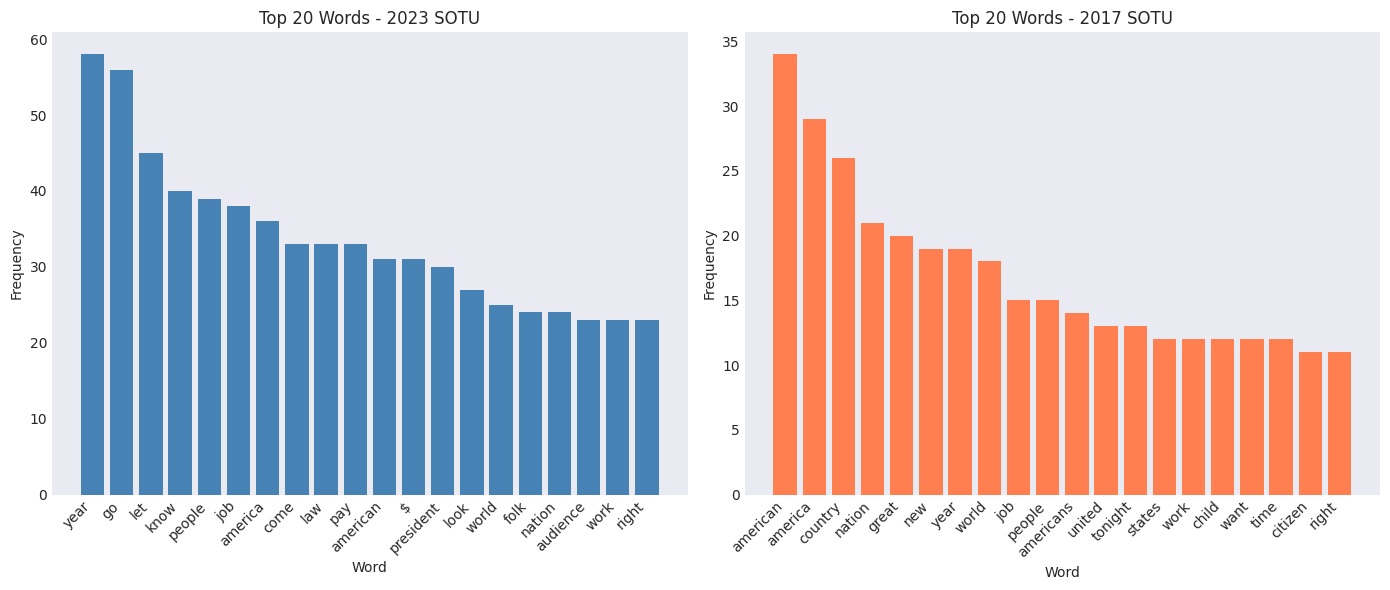


Key differences between 2023 and 2017:
- 2023 emphasizes action words: 'go', 'let', 'come', 'look', 'pay'
- 2017 has more patriotic/unity terms: 'united', 'states', 'citizen', 'great'
- Both speeches focus heavily on 'america/american' and 'people'


In [13]:
# Create side-by-side bar charts comparing 2023 and 2017
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 2023
axes[0].bar(range(len(df_2023)), df_2023['Count'], color='steelblue')
axes[0].set_xticks(range(len(df_2023)))
axes[0].set_xticklabels(df_2023['Word'], rotation=45, ha='right')
axes[0].set_title('Top 20 Words - 2023 SOTU')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Word')

# Plot 2017
axes[1].bar(range(len(df_2017)), df_2017['Count'], color='coral')
axes[1].set_xticks(range(len(df_2017)))
axes[1].set_xticklabels(df_2017['Word'], rotation=45, ha='right')
axes[1].set_title('Top 20 Words - 2017 SOTU')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Word')

plt.tight_layout()
plt.savefig('outputs/word_frequency_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Analysis
print("\nKey differences between 2023 and 2017:")
print("- 2023 emphasizes action words: 'go', 'let', 'come', 'look', 'pay'")
print("- 2017 has more patriotic/unity terms: 'united', 'states', 'citizen', 'great'")
print("- Both speeches focus heavily on 'america/american' and 'people'")

In [14]:
# Import libraries for TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

In [15]:
# Get all speech texts (using all speeches, not just 2000+)
raw_docs = sou["Text"].to_list()
print(f"Total documents for TF-IDF: {len(raw_docs)}")

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit to top 5000 words for efficiency
    min_df=2,            # Word must appear in at least 2 documents
    stop_words='english' # Remove English stop words
)

# Fit and transform the documents
vectorized_docs = vectorizer.fit_transform(raw_docs)
print(f"TF-IDF matrix shape: {vectorized_docs.shape}")
print(f"(Documents: {vectorized_docs.shape[0]}, Features: {vectorized_docs.shape[1]})")

Total documents for TF-IDF: 246
TF-IDF matrix shape: (246, 5000)
(Documents: 246, Features: 5000)


In [16]:
# Use PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=42)

# Convert sparse matrix to dense for PCA
vectorized_dense = vectorized_docs.toarray()

# Fit and transform with PCA
pca_result = pca.fit_transform(vectorized_dense)

# Create DataFrame for plotting
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2']
)
pca_df['President'] = sou['President'].values
pca_df['Year'] = sou['Year'].values

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

Explained variance ratio: [0.141265   0.04068415]
Total variance explained: 18.19%


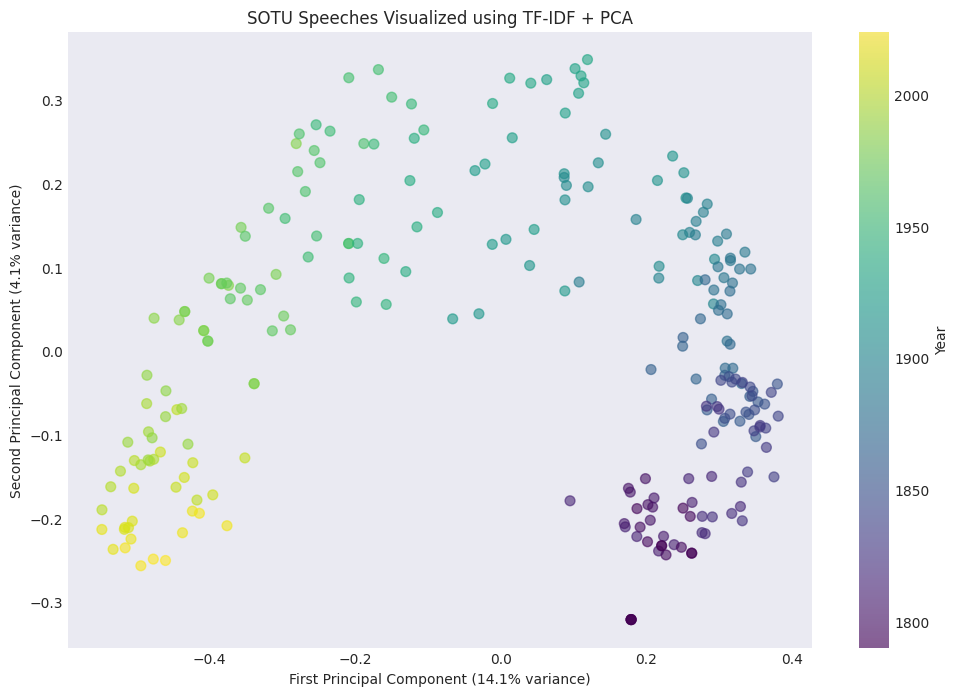

In [17]:
# Plot speeches in 2D using PCA components
plt.figure(figsize=(12, 8))

# Create scatter plot colored by year
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=pca_df['Year'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     s=50)

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('SOTU Speeches Visualized using TF-IDF + PCA')
plt.colorbar(scatter, label='Year')

# Save the figure
plt.savefig('outputs/tfidf_pca_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

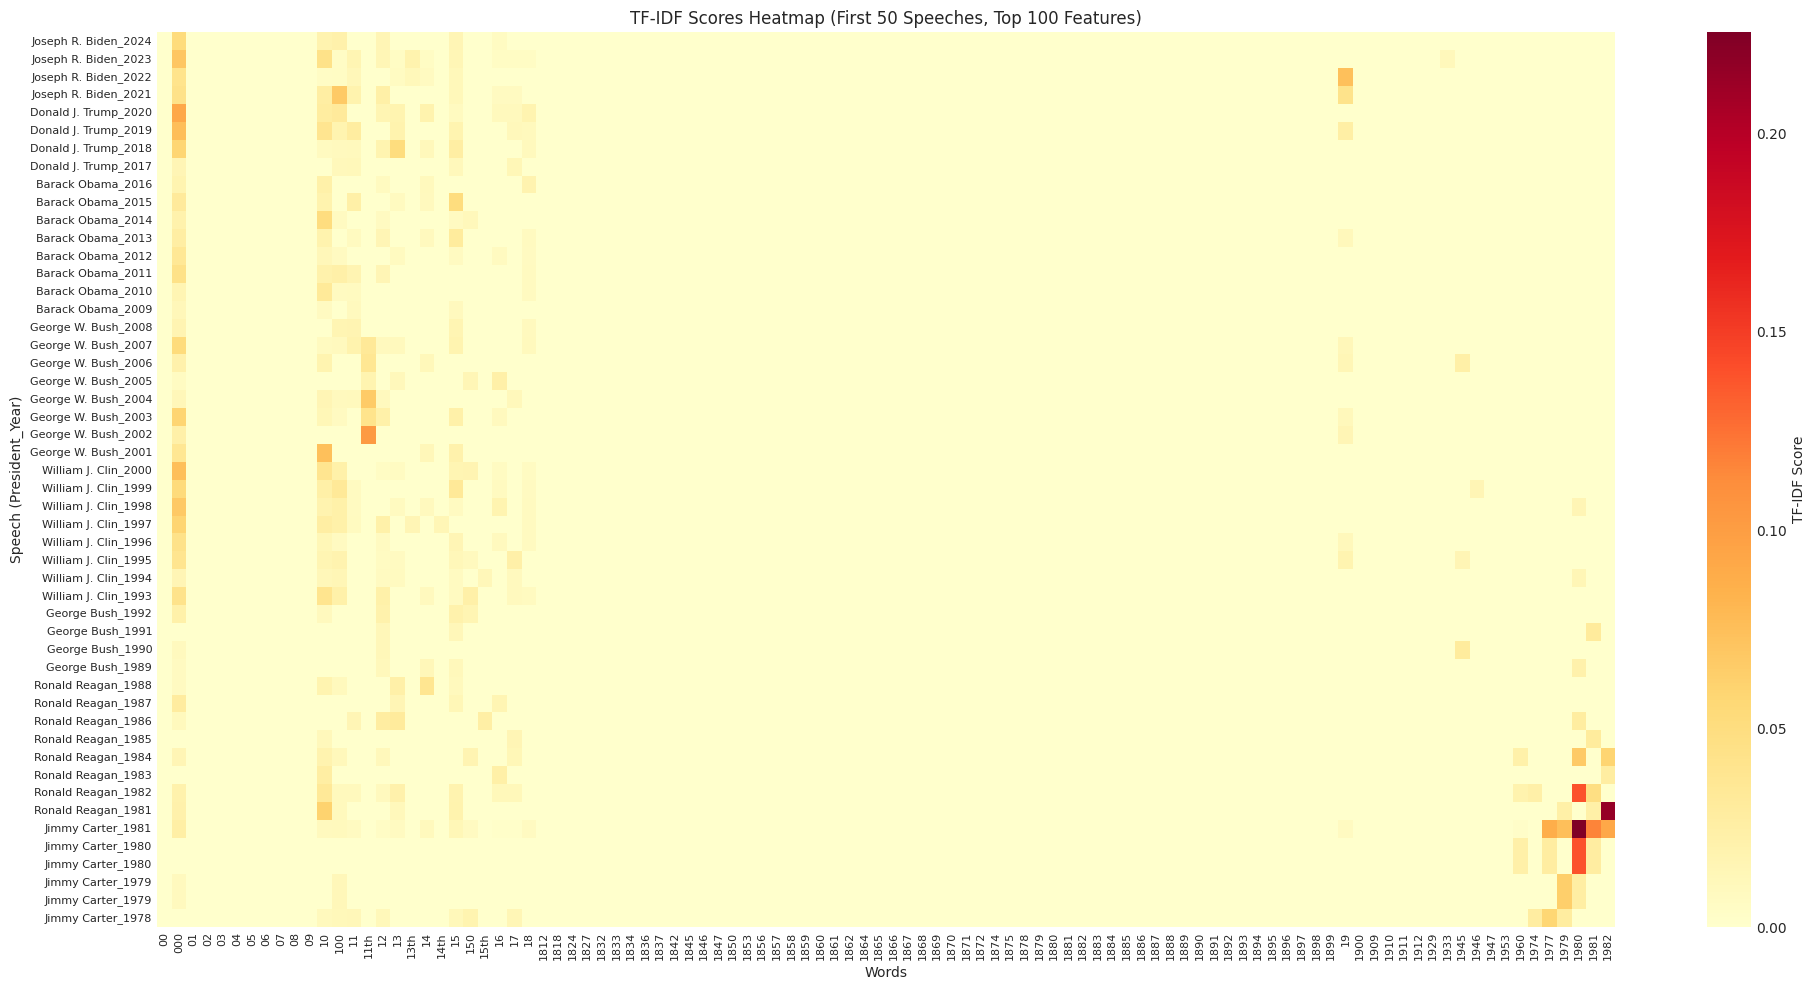

In [18]:
# Create a heatmap showing TF-IDF scores (subset for visibility)
# Show first 50 speeches and top 100 features

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense (subset)
subset_docs = 50  # Show first 50 documents
subset_features = 100  # Show top 100 features

# Get the subset of the matrix
tfidf_subset = vectorized_docs[:subset_docs, :subset_features].toarray()

# Create heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(tfidf_subset, 
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Score'},
            xticklabels=feature_names[:subset_features],
            yticklabels=[f"{sou.iloc[i]['President'][:15]}_{sou.iloc[i]['Year']:.0f}" 
                        for i in range(subset_docs)])

plt.title('TF-IDF Scores Heatmap (First 50 Speeches, Top 100 Features)')
plt.xlabel('Words')
plt.ylabel('Speech (President_Year)')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

# Save the figure
plt.savefig('outputs/tfidf_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

In [19]:
# Get TF-IDF scores for the top 10 most common words
word_list = ['year', 'america', 'people', 'american', 'work', 
             'new', 'job', 'country', 'americans', 'world']

# Get word indices in the vocabulary
word_indices = []
idf_scores = []

for word in word_list:
    try:
        idx = vectorizer.vocabulary_[word]
        word_indices.append(idx)
        idf_scores.append(vectorizer.idf_[idx])
    except KeyError:
        print(f"Word '{word}' not in vocabulary")
        word_indices.append(-1)
        idf_scores.append(0)

# Get TF-IDF scores for the first speech
first_speech_tfidf = vectorized_docs[0].toarray().flatten()
tf_idf_scores = [first_speech_tfidf[idx] if idx != -1 else 0 for idx in word_indices]

# Create results DataFrame
results_df = pd.DataFrame({
    "Word": word_list,
    "IDF Score": idf_scores,
    "TF-IDF Score (Speech 1)": tf_idf_scores
})

print("TF-IDF Analysis for Top Words in First Speech:")
print(results_df.to_string(index=True))
print(f"\nFirst speech: {sou.iloc[0]['President']} ({sou.iloc[0]['Year']:.0f})")

TF-IDF Analysis for Top Words in First Speech:
        Word  IDF Score  TF-IDF Score (Speech 1)
0       year   1.032925                 0.054602
1    america   1.272946                 0.164486
2     people   1.037118                 0.103555
3   american   1.102217                 0.110055
4       work   1.162281                 0.013653
5        new   1.024591                 0.039116
6        job   2.043480                 0.024005
7    country   1.008130                 0.032567
8  americans   1.713598                 0.100648
9      world   1.138750                 0.063540

First speech: Joseph R. Biden (2024)
